## Classificação Básica

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow e tf.keras
import tensorflow as tf
from tensorflow import keras

# Bibliotecas de ajuda
import numpy as np
import matplotlib.pyplot as plt

# Versão TensorFlow
print(tf.__version__)

1.13.1


## Importando o dataset Fashion MNIST

In [0]:
# A base de dados contém 70 mil imagens preto e branco e 10 categorias diferentes
fashion_mnist = keras.datasets.fashion_mnist

# Dividindo o dataset em teste e treino
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Explorando os dados

In [0]:
# 60 mil imagens, cada imagem possui 28 x 28 píxeis
train_images.shape

(60000, 28, 28)

In [0]:
len(train_labels)

60000

In [0]:
# cada label é um inteiro entre 0 e 9
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [0]:
test_images.shape

(10000, 28, 28)

In [0]:
len(test_labels)

10000

## Pré-processando os dados

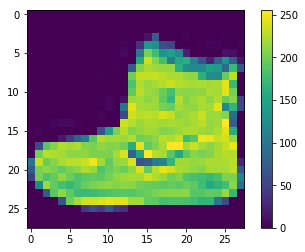

In [0]:
# Observando a primeira imagem dos dados de treino, pode-se observar que o valor de cada píxel vai estar no intervalo ente 0 e 255.
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
# Escalonando os valores para estarem no intervalo de 0 e 1 antes de entrar no modelo neural.
train_images = train_images / 255.0
test_images = test_images / 255.0

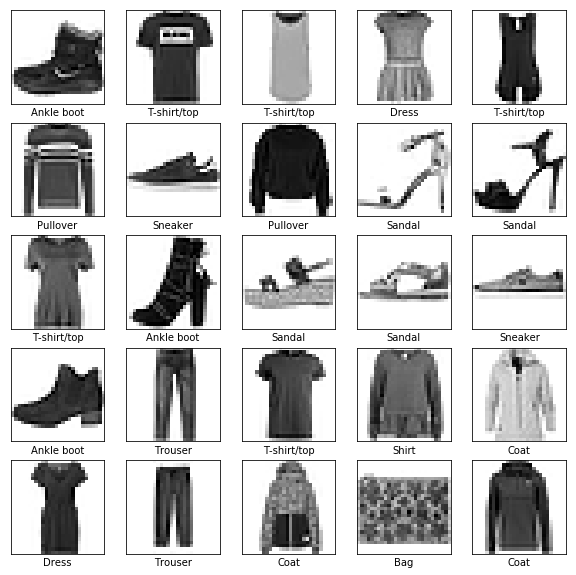

In [0]:
# Mostrando as 25 primeiras imagens de treino e a classe que pertencem
plt.figure(figsize = (10, 10))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap = plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

## Construindo o modelo

In [0]:
model = keras.Sequential([
    # 1º camada: transforma o formato das imagens de um vetor 2D (28 x 28) num vetor 1D (28 * 28 = 784)
    keras.layers.Flatten(input_shape = (28, 28)),
    # 2º camada: possui 128 nós (ou neurónios)
    keras.layers.Dense(128, activation = tf.nn.relu),
    # 3º camada: a última camada possui 10 nós (ou nerónios)
    keras.layers.Dense(10, activation = tf.nn.softmax)
])

## Compilando o modelo

In [0]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Treinando o modelo

In [0]:
model.fit(train_images, train_labels, epochs = 5)

Epoch 1/5
60000/60000 [==============================] - 8s 138us/sample - loss: 0.4956 - acc: 0.8250
Epoch 2/5
60000/60000 [==============================] - 8s 136us/sample - loss: 0.3716 - acc: 0.8648
Epoch 3/5
60000/60000 [==============================] - 9s 152us/sample - loss: 0.3333 - acc: 0.8785
Epoch 4/5
60000/60000 [==============================] - 9s 144us/sample - loss: 0.3102 - acc: 0.8850
Epoch 5/5
60000/60000 [==============================] - 8s 137us/sample - loss: 0.2938 - acc: 0.8906


## Avaliando a exatidão

In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 47us/sample - loss: 0.3450 - acc: 0.8764
Test accuracy: 0.8764


## Fazer previsões

In [0]:
predictions = model.predict(test_images)

In [0]:
predictions[0]

array([6.84550178e-05, 5.65155247e-08, 5.42310336e-05, 5.27289558e-07,
       3.60646227e-05, 1.38541395e-02, 8.48892669e-05, 5.18695302e-02,
       4.16424999e-04, 9.33615565e-01], dtype=float32)

In [0]:
np.argmax(predictions[0])

9

In [0]:
test_labels[0]

9

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)
  
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
    
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                      100*np.max(predictions_array),
                                      class_names[true_label]),
                                      color=color)
  
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

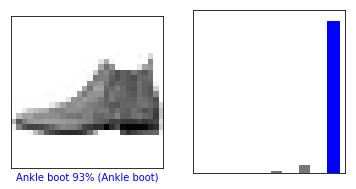

In [0]:
i = 0
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions, test_labels)
plt.show()

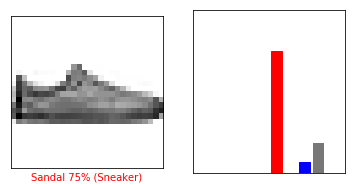

In [0]:
i = 12
plt.figure(figsize = (6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions, test_labels)
plt.show()

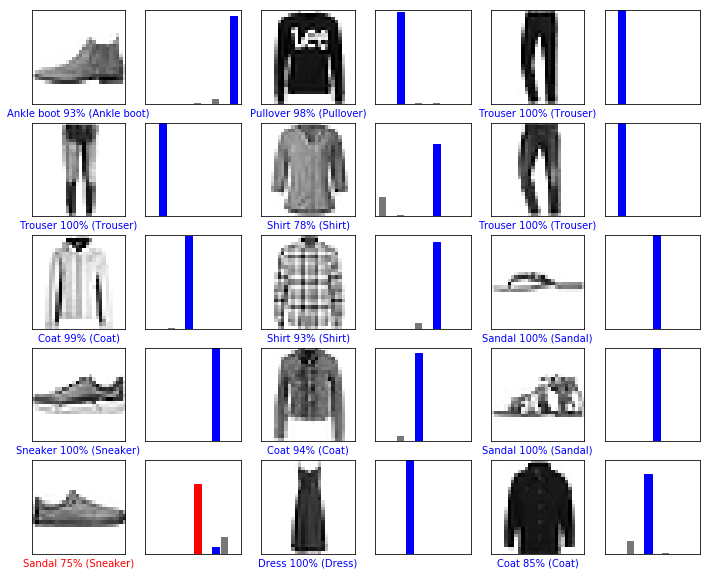

In [0]:
# Criando o gráfico das primeiras X imagens, o label previsto e o label correto
# Colorindo as previsões corretas de azul e as incorretas de vermelho
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

### Fazendo a previsão de uma única imagem

In [0]:
# Escolhendo uma imagem dos dados de teste
img = test_images[0]

print(img.shape)

(28, 28)


In [0]:
# Adicionando a iamgem a um batch onde é o único membro
img = (np.expand_dims(img, 0))

print(img.shape)

(1, 28, 28)


In [0]:
# Fazendo a previsão
predictions_single = model.predict(img)

print(predictions_single)

[[6.8455141e-05 5.6515418e-08 5.4231085e-05 5.2729052e-07 3.6064623e-05
  1.3854147e-02 8.4889267e-05 5.1869560e-02 4.1642482e-04 9.3361557e-01]]


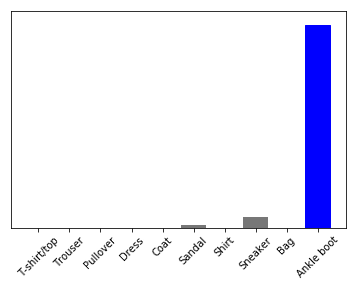

In [0]:
plot_value_array(0, predictions_single, test_labels) 
_ = plt.xticks(range(10), class_names, rotation = 45)

In [0]:
# Selecionando a previsão para uma única imagem do batch
np.argmax(predictions_single[0])

9